In [36]:
## Import useful the pachages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier# use by boruta and RF
from sklearn.metrics import accuracy_score, balanced_accuracy_score 
from sklearn.metrics import  recall_score, precision_score, f1_score, matthews_corrcoef # the metrics
from imblearn.over_sampling import RandomOverSampler # for oversampling
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix,  classification_report
from sklearn.metrics import ConfusionMatrixDisplay ,make_scorer# The additionnal metric ROC and fourfold plots
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from tqdm import tqdm
from IPython.display import Image
import pydotplus
from sklearn.model_selection import learning_curve
from sklearn.impute import KNNImputer


## Import DataSet and Preprocessing 

In [3]:
#Import Dataset
data = pd.read_excel('dataset.xlsx')
# show the 5 first row
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# display the columns
data.columns.to_list()

['Patient ID',
 'Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Urea',

In [5]:
# Save a copy of the Dataset before preprocessing
df = data.copy()
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# display the shape of the data
data.shape

(5644, 111)

In [7]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [8]:
missing_rate = df.isna().sum()/df.shape[0]

In [9]:
# By see the distribution of the missing rate 
#we notice that missing rate between 0.88 and 0.9 are for blood composite 
# and between 0.75 and 0.8 is different viral 
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [10]:
# we just focus on the information in the virus(disease) , 
#the blood and  key colummns 
df = df[key_columns + blood_columns + viral_columns]

In [11]:
df.shape

(5644, 33)

In [12]:
df[viral_columns]

,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
             'True': 1,
            'False':0,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [14]:
def feature_engineering(df):
    df['Is Sick ?'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

In [15]:
def imputation(df):
    df = df.dropna(axis=0)
    return  df

In [16]:
def preprocessing(df):
    
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
      
    return df

In [17]:
covid_data = preprocessing(df)

In [18]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 5643
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient age quantile                              598 non-null    int64  
 1   SARS-Cov-2 exam result                            598 non-null    int64  
 2   Hematocrit                                        598 non-null    float64
 3   Hemoglobin                                        598 non-null    float64
 4   Platelets                                         598 non-null    float64
 5   Mean platelet volume                              598 non-null    float64
 6   Red blood Cells                                   598 non-null    float64
 7   Lymphocytes                                       598 non-null    float64
 8   Mean corpuscular hemoglobin concentration (MCHC)  598 non-null    float64
 9   Leukocytes          

In [19]:
covid_data['Is Sick ?'] = covid_data['Is Sick ?'].astype(int)

In [20]:
covid_data.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Is Sick ?
1,17,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,1
8,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0
15,9,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,1
18,11,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,1
22,9,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0


In [21]:
covid_data.shape

(598, 17)

In [22]:
covid_data.to_csv('covid_data.csv', index=False)

In [23]:
#importing the dataset
df = pd.read_csv("covid_data.csv")
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Is Sick ?
0,17,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,1
1,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0
2,9,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,1
3,11,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,1
4,9,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0


In [24]:
df.shape

(598, 17)

In [25]:
df.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Is Sick ?'],
      dtype='object')

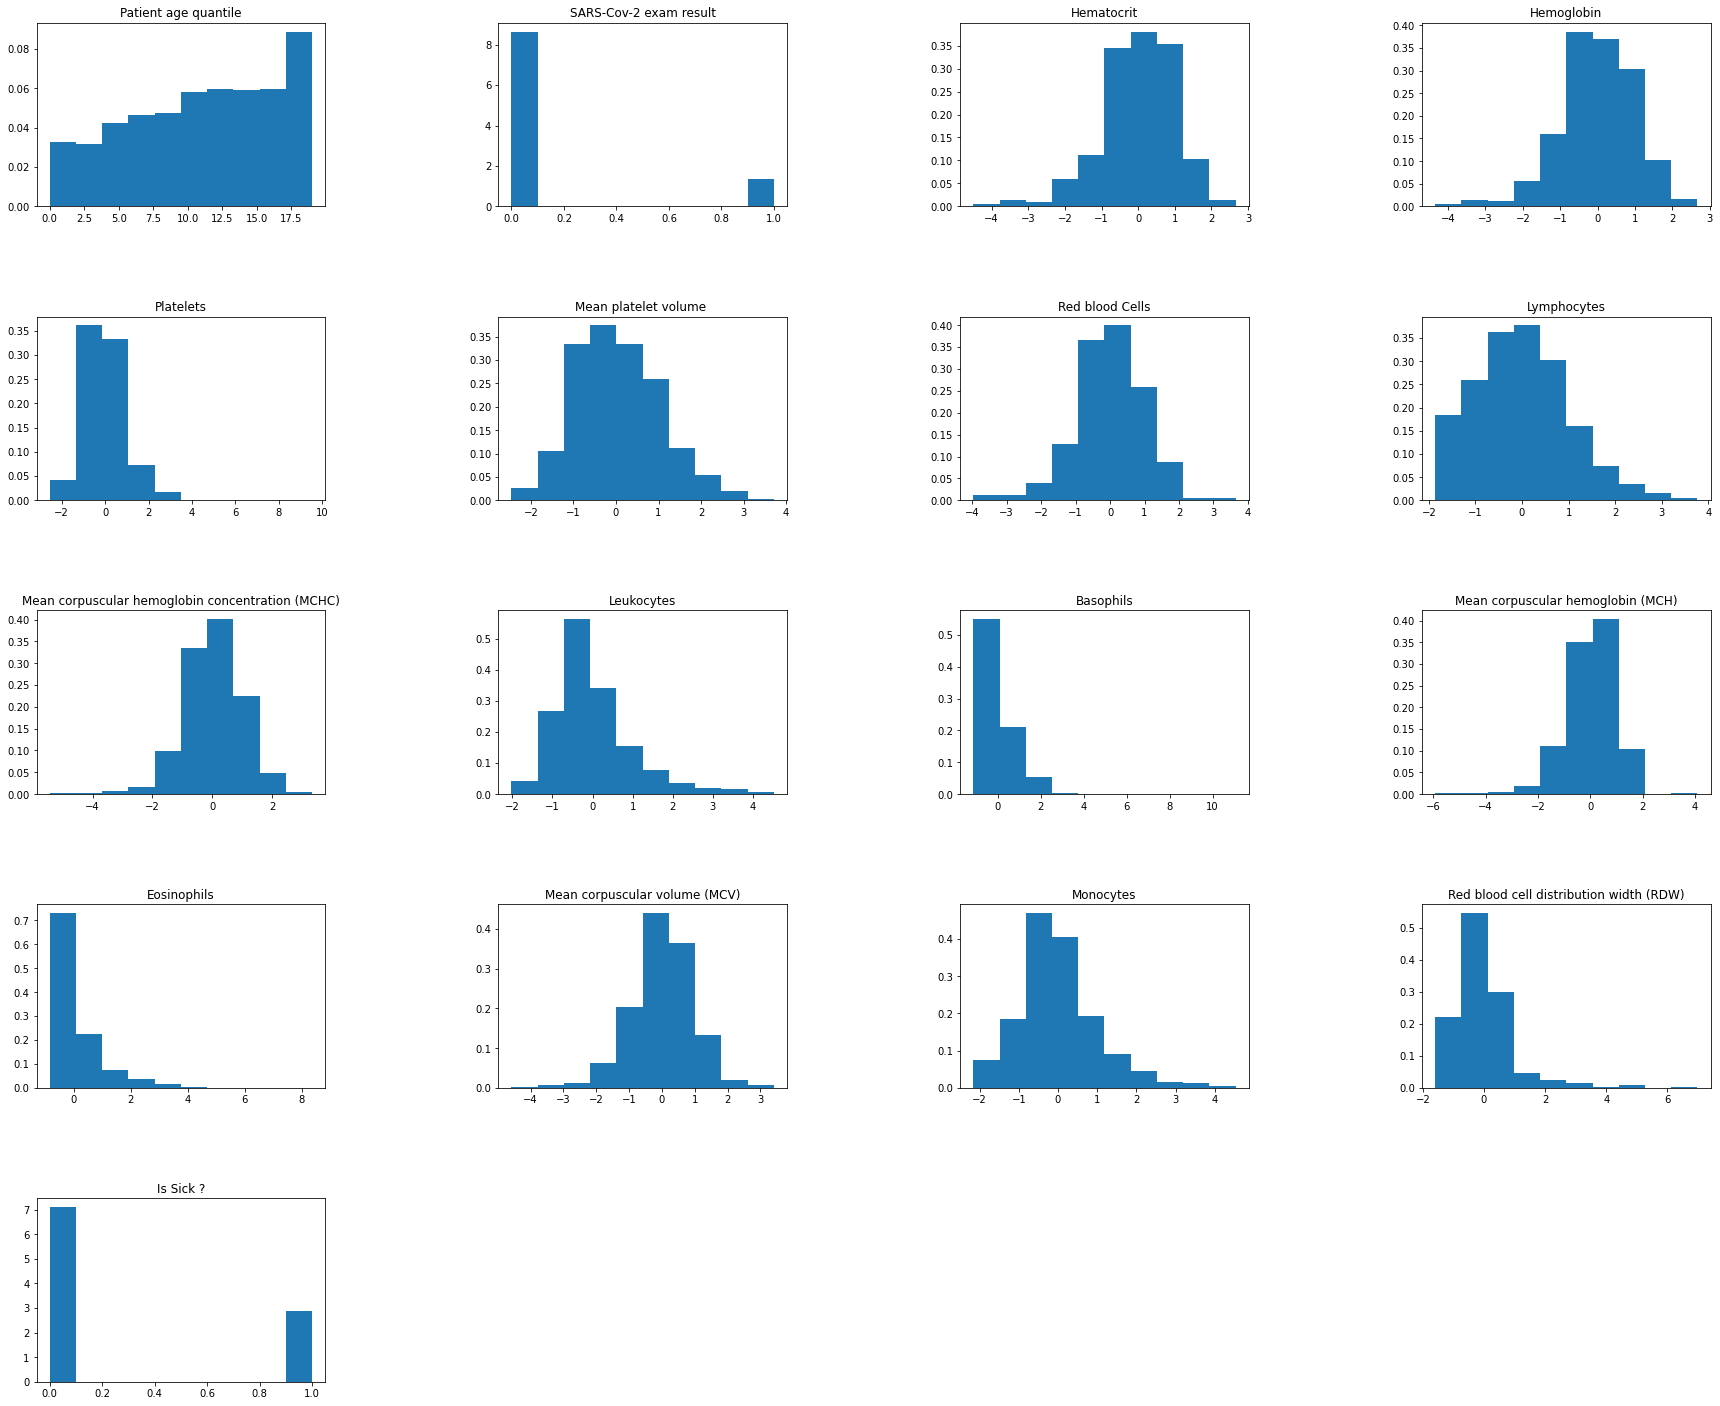

In [26]:
## Histogramm of the features
# Create the figure and subplots
fig, axs = plt.subplots(5, 4, figsize=(30,25))

# Flatten the axs array to make it easier to iterate through
axs = axs.flatten()

# Loop through each feature and plot a histogram in a separate subplot
for i, col in enumerate(df.columns):
    axs[i].hist(df[col], density = True, bins=10)
    axs[i].set_title(col)

# Hide any unused subplots
for i in range(len(df.columns), 5 * 4):
    axs[i].axis('off')

# Add a main title and adjust the spacing between subplots
#plt.suptitle('Histograms for Multiple Features')
plt.subplots_adjust(hspace=0.6, wspace=0.6)
#fig.suptitle("Histogram for the features", fontsize = 30)

# Show the plot
plt.show()

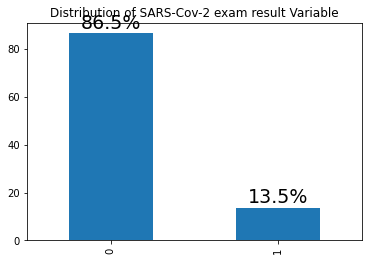

In [27]:
#To check our target variable()

ax = df["SARS-Cov-2 exam result"].value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y)

    # Annotate plot
    ax.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=19)
    # Add a title to the plot
ax.set_title('Distribution of SARS-Cov-2 exam result Variable')
plt.savefig('Imbalanced_data.png')
# Remove y axis
#ax.get_yaxis().set_visible(False)

<AxesSubplot:>

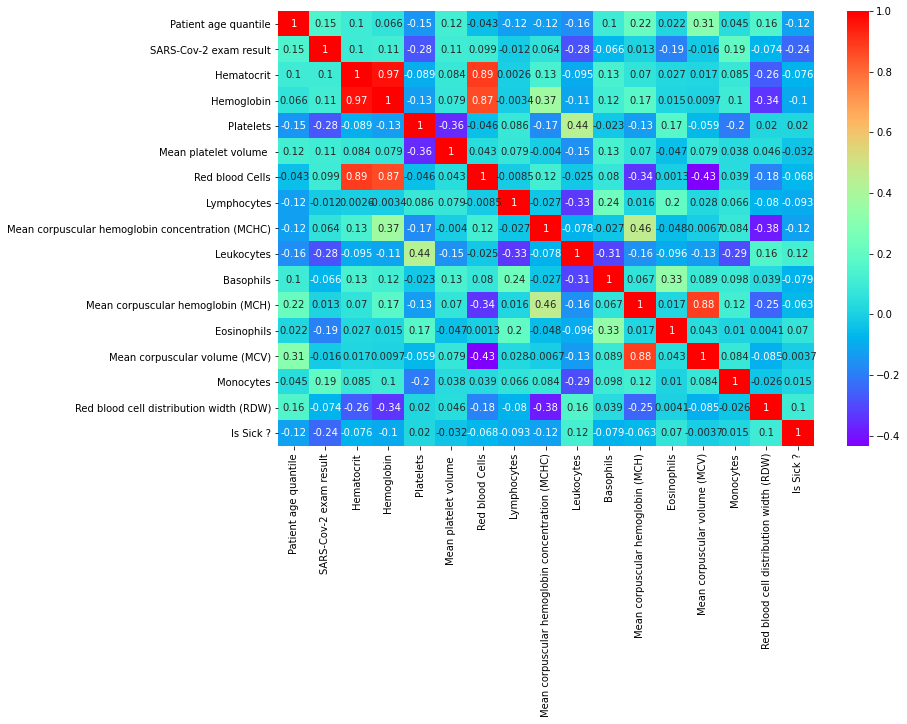

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")

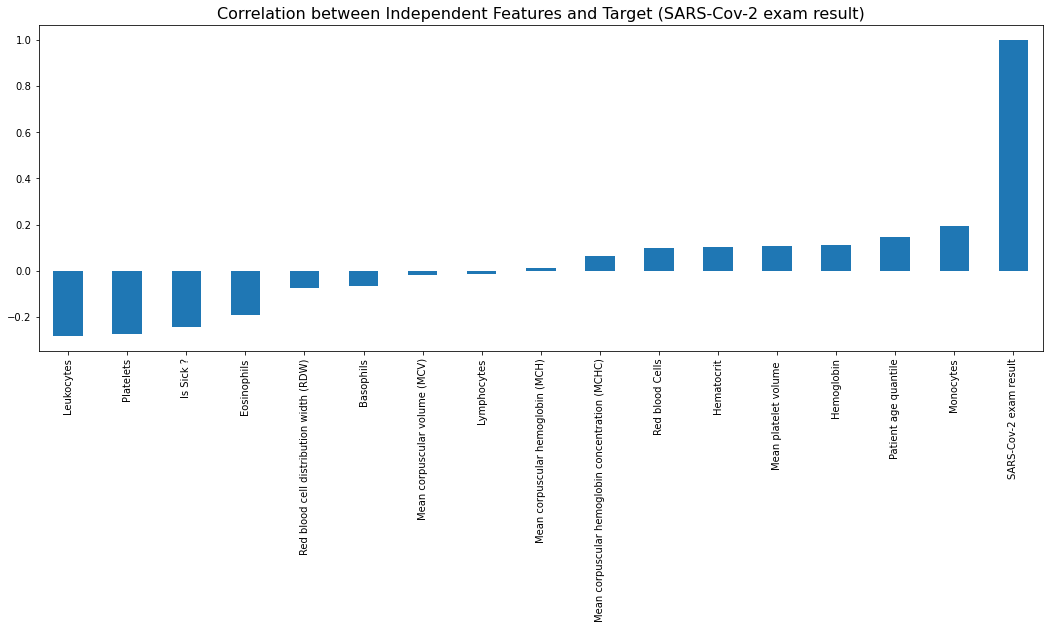

In [29]:
#Let's find the correlation between the independent and the dependent feature (obese)
df.corr()['SARS-Cov-2 exam result'].sort_values().plot(kind='bar', figsize=(18, 6))
# Add a title to the plot
plt.title('Correlation between Independent Features and Target (SARS-Cov-2 exam result)', fontsize=16)

# Show plot
plt.show()

In [30]:
#Select the features and the target variable

X,y = df.drop('SARS-Cov-2 exam result',axis =1), df['SARS-Cov-2 exam result']

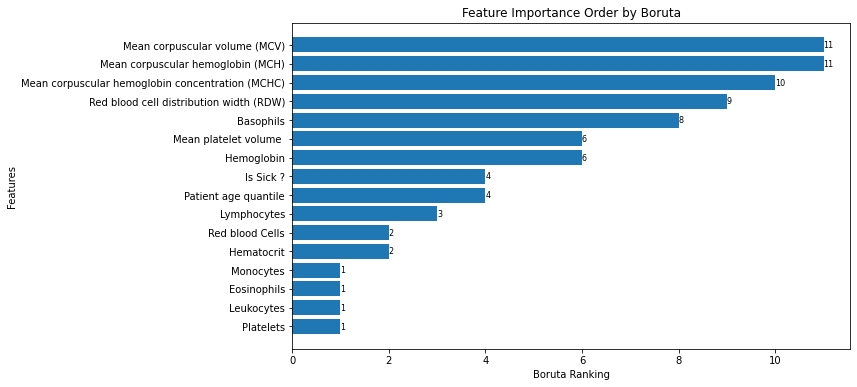

Selected Features in Order of Importance: ['Platelets', 'Leukocytes', 'Eosinophils', 'Monocytes', 'Hematocrit', 'Red blood Cells', 'Lymphocytes', 'Patient age quantile', 'Is Sick ?', 'Hemoglobin', 'Mean platelet volume ', 'Basophils', 'Red blood cell distribution width (RDW)', 'Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Mean corpuscular hemoglobin (MCH)', 'Mean corpuscular volume (MCV)']


<Figure size 432x288 with 0 Axes>

In [31]:
# Initialize a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform Boruta feature selection
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=42)
boruta_selector.fit(X.values, y.values)

# Get selected features and their rankings
feature_ranks = list(zip(X.columns, boruta_selector.ranking_))
feature_ranks.sort(key=lambda x: x[1])  # Sort by Boruta ranking

# Visualizing important features in sorted order with Boruta rankings as annotations
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
features_sorted, ranks_sorted = zip(*feature_ranks)
bars = plt.barh(features_sorted, ranks_sorted)
plt.xlabel('Boruta Ranking')
plt.ylabel('Features')
plt.title('Feature Importance Order by Boruta')

# Adding Boruta rankings as annotations on the bars
for bar, rank in zip(bars, ranks_sorted):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{rank}',
             va='center', ha='left', fontsize=8)

plt.show()
plt.savefig('Features_Importance.png')
# Get selected features in descending order of importance
selected_features = [feature[0] for feature in feature_ranks]
print("Selected Features in Order of Importance:", selected_features)

In [32]:
X_train , X_test, y_train, y_test = train_test_split(X,y,random_state=120,test_size = 0.3 )
print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape =', X_test.shape)
print('y_test shape =', y_test.shape)


X_train shape =  (418, 16)
y_train shape =  (418,)
X_test shape = (180, 16)
y_test shape = (180,)


In [33]:
scaler=StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed  = scaler.transform(X_test)

### GridSearchCV

In [34]:
# Define the parameter grids for each model
param_grids = {
        'DecisionTree': {'criterion': ["gini", "entropy"],
                         "max_depth" : [None,5, 7,10, 15], 
                         "min_samples_split": [2,7, 5,10] ,
                        "min_samples_leaf" : [1,2,4]},
        'LogisticRegression': {"penalty" : ['l1', 'l2', "elasticnet"],
            'C': [0.001,0.01, 0.1, 1, 10, 100]}
    }

# Create scorers for each metric
scorers = {
    'Accuracy': make_scorer(accuracy_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'Precision': make_scorer(precision_score, average='macro'),
    'Recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}
    
    # Initialize models
models = {
        'DecisionTree': DecisionTreeClassifier(),
        'LogisticRegression': LogisticRegression()
    }

    #Perform GridSearchCV for each model
for model_name, model in models.items():
    
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,
                                   scoring=scorers, refit='Balanced Accuracy' )
        grid_search.fit(X_train_transformed, y_train)

        # Get the best parameters and the best score
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        print(f"Model: {model_name}")
        print("Best Parameters:", best_params)
        print("Best Score:", best_score)     

Model: DecisionTree
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.7249250626546767
Model: LogisticRegression
Best Parameters: {'C': 100, 'penalty': 'l2'}
Best Score: 0.6756088414307481


### Resampling method Without any strategy using the best hyperparameter find during the GridSearchCV

In [37]:
resample_methods1 = [SMOTE(random_state=42),
                    BorderlineSMOTE(random_state=42),
                    RandomOverSampler(random_state=42),
                   ADASYN(random_state = 42),
                   SMOTEENN(random_state=42),
                  ]

models = [('DecisionTree', DecisionTreeClassifier(criterion= 'entropy',
                                                  max_depth= 5, min_samples_leaf= 4,
                                                  min_samples_split = 2)), 
         ('LogisticRegression', LogisticRegression(C= 100, penalty= 'l2'))]

results = pd.DataFrame(columns=["Resample Method", "Model",
                                "Accuracy Score", 
                                "Balanced Accuracy Score", "F1 Score"])

for resample_method in resample_methods1:
    model_results = pd.DataFrame(columns=["Model", "Accuracy Score", "Balanced Accuracy Score", "F1 Score"])
    x_resampled, y_resampled = resample_method.fit_resample(X_train_transformed, y_train)
    
    for clf_name, clf in tqdm(models):
        clf.fit(x_resampled, y_resampled)
        predictions = clf.predict(X_test_transformed)
        accuracy = accuracy_score(y_test, predictions)
        bal_accuracy = balanced_accuracy_score(y_test, predictions)
        f1score = f1_score(y_test, predictions)
        sensitivity = recall_score(y_test, predictions)
        specificity = recall_score(y_test, predictions, pos_label=0)
        precision = precision_score(y_test, predictions)
        
        new_row = {"Model": clf_name, "Accuracy Score": accuracy, 
                   "Balanced Accuracy Score": bal_accuracy, 
                   "F1 Score": f1score,
                  "sensitivity" : sensitivity,
               "specificity":specificity,
               "precision" : precision
               }
        model_results = model_results.append(new_row, ignore_index=True)

    model_results["Resample Method"] = resample_method.__class__.__name__
    results = pd.concat([results, model_results])

results.sort_values(by="F1 Score", ascending=False, inplace=True)
results.to_excel("resampling_results.xlsx")
results

100%|██████████| 2/2 [00:00<00:00, 28.31it/s]


,Resample Method,Model,Accuracy Score,Balanced Accuracy Score,F1 Score,precision,sensitivity,specificity
0,SMOTE,DecisionTree,0.844444,0.866667,0.658537,0.519231,0.900000,0.833333
1,RandomOverSampler,LogisticRegression,0.850000,0.856667,0.658228,0.530612,0.866667,0.846667
1,BorderlineSMOTE,LogisticRegression,0.861111,0.836667,0.657534,0.558140,0.800000,0.873333
1,SMOTE,LogisticRegression,0.838889,0.823333,0.623377,0.510638,0.800000,0.846667
0,ADASYN,DecisionTree,0.838889,0.810000,0.613333,0.511111,0.766667,0.853333
1,ADASYN,LogisticRegression,0.822222,0.813333,0.600000,0.480000,0.800000,0.826667
1,SMOTEENN,LogisticRegression,0.788889,0.833333,0.586957,0.435484,0.900000,0.766667
0,SMOTEENN,DecisionTree,0.794444,0.810000,0.574713,0.438596,0.833333,0.786667
0,RandomOverSampler,DecisionTree,0.827778,0.763333,0.563380,0.487805,0.666667,0.860000
0,BorderlineSMOTE,DecisionTree,0.783333,0.803333,0.561798,0.423729,0.833333,0.773333


### Confusion Matrix

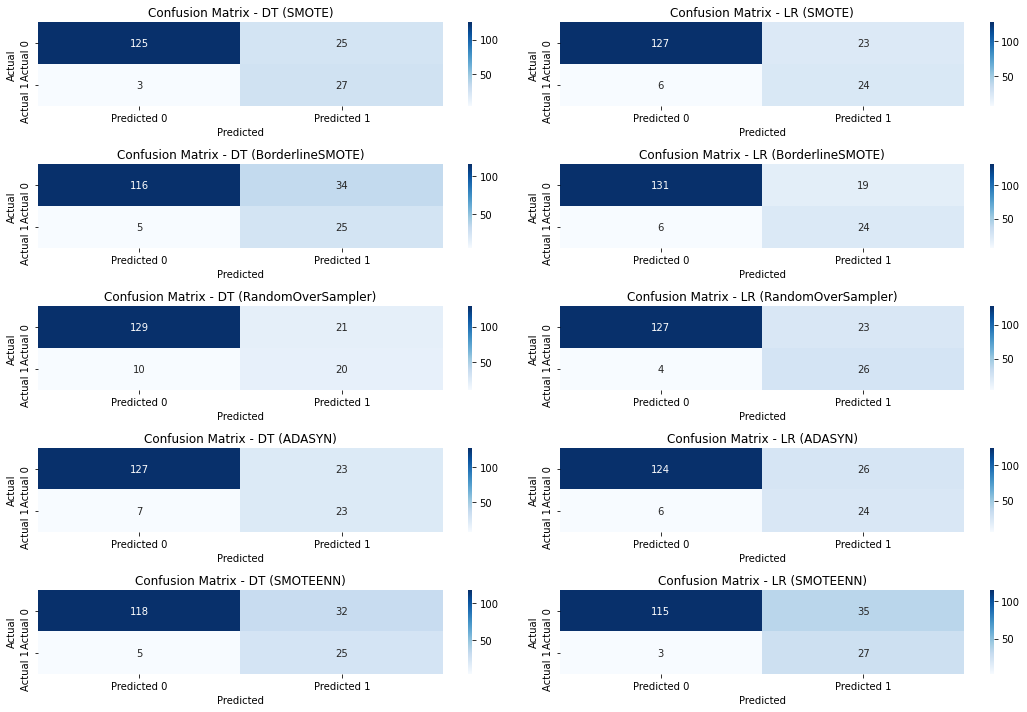

<Figure size 432x288 with 0 Axes>

In [38]:
# List of models
models = [('DT', DecisionTreeClassifier(criterion='entropy',
                                                  max_depth=5, min_samples_leaf=4,
                                                  min_samples_split=2)),
          ('LR', LogisticRegression(C=100, penalty='l2'))]

# DataFrame to store the results
results = pd.DataFrame(columns=["Resample Method", "Model",
                                "Accuracy Score",
                                "Balanced Accuracy Score", "F1 Score"])

# Create a figure with subplots for confusion matrices
fig, axes = plt.subplots(len(resample_methods1), len(models), figsize=(15, 10))

# Iterate over resampling methods
for i, resample_method in enumerate(resample_methods1):
    x_resampled, y_resampled = resample_method.fit_resample(X_train_transformed, y_train)

    # Iterate over models
    for j, (clf_name, clf) in enumerate(models):
        ax = axes[i][j]  # Get the current subplot

        # Fit the model on the resampled data and make predictions
        clf.fit(x_resampled, y_resampled)
        predictions = clf.predict(X_test_transformed)
        accuracy = accuracy_score(y_test, predictions)
        bal_accuracy = balanced_accuracy_score(y_test, predictions)
        f1score = f1_score(y_test, predictions)

        # Confusion matrix
        cm = confusion_matrix(y_test, predictions)
        cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

        # Plot confusion matrix on the current subplot
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'Confusion Matrix - {clf_name} ({resample_method.__class__.__name__})')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()
plt.savefig('Confusion_matrix.png')

### ROC AUC Curve 

100%|██████████| 2/2 [00:00<00:00, 22.39it/s]


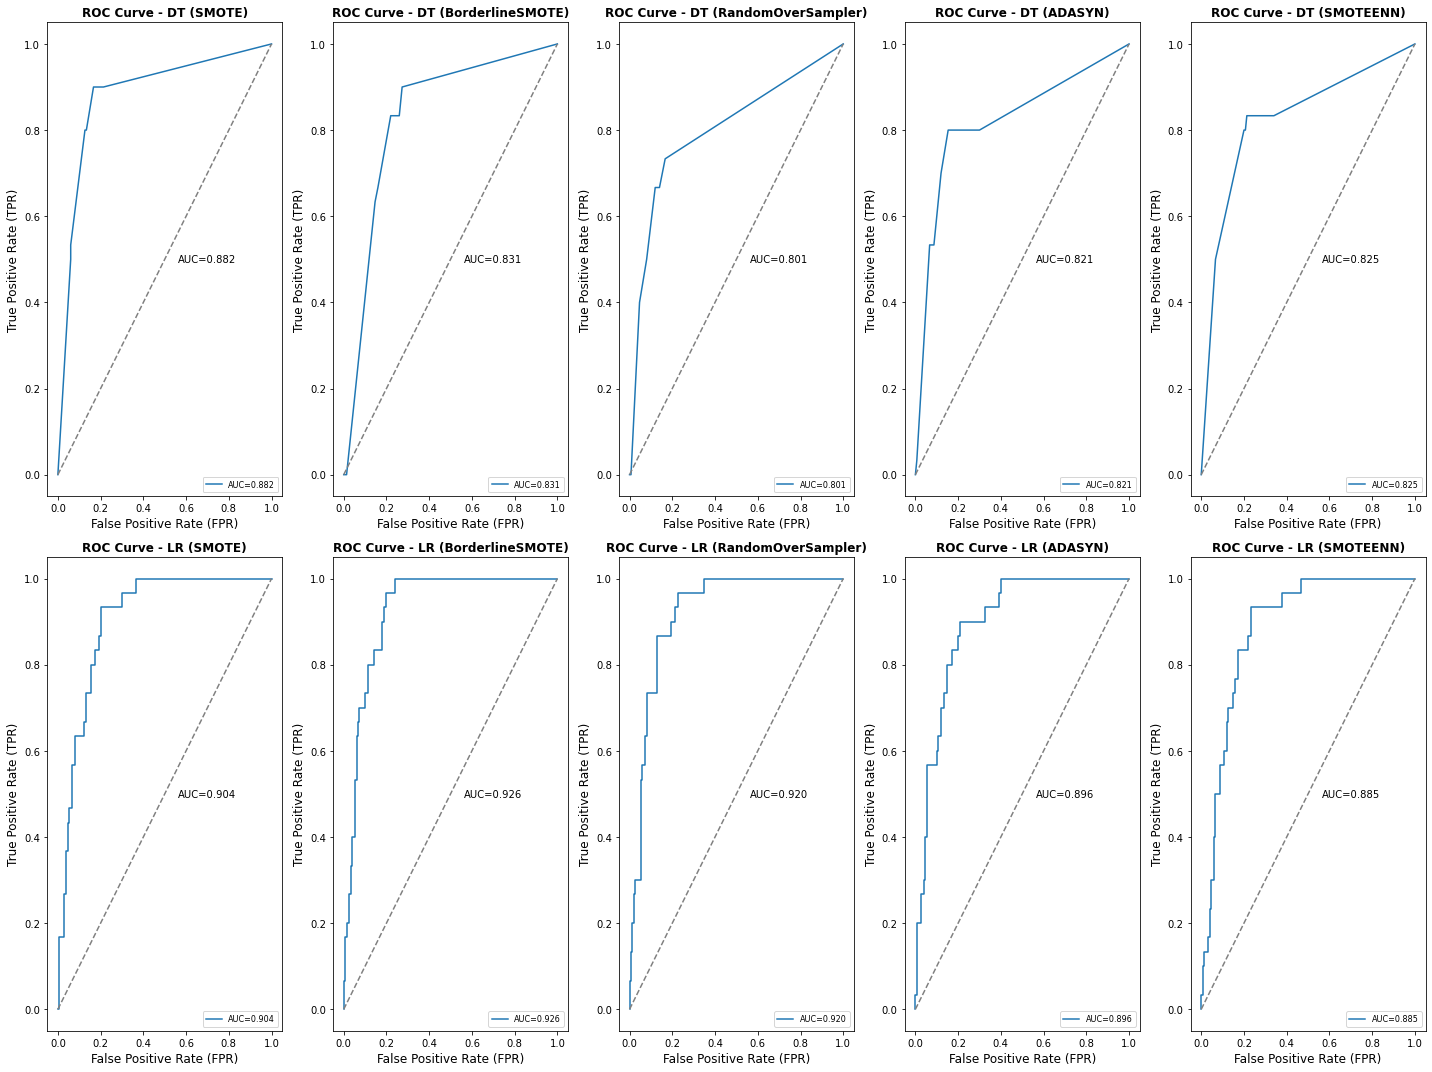

<Figure size 432x288 with 0 Axes>

In [39]:
models = [('DT', DecisionTreeClassifier(criterion='entropy',
                                                  max_depth=5, min_samples_leaf=4,
                                                  min_samples_split=2)),
          ('LR', LogisticRegression(C=100, penalty='l2'))]

result_table = pd.DataFrame(columns=['Resample Method', 'Model', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for resample_method in resample_methods1:
    x_resampled, y_resampled = resample_method.fit_resample(X_train_transformed, y_train)

    for clf_name, clf in tqdm(models):
        model = clf.fit(x_resampled, y_resampled)
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test_transformed)[:, 1]
        else:
            # For models without predict_proba, you may need to use decision_function or other appropriate method
            y_proba = model.decision_function(X_test_transformed)

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_value = roc_auc_score(y_test, y_proba)

        result_table = result_table.append({'Resample Method': resample_method.__class__.__name__,
                                            'Model': clf_name,
                                            'fpr': fpr,
                                            'tpr': tpr,
                                            'auc': auc_value}, ignore_index=True)

# Plot ROC curves for each model and resampling method
fig, axs = plt.subplots(len(models), len(resample_methods1), figsize=(20, 15))
for i, resample_method in enumerate(resample_methods1):
    for j, (clf_name, clf) in enumerate(models):
        ax = axs[j, i]
        roc_data = result_table[(result_table['Resample Method'] == resample_method.__class__.__name__) &
                                (result_table['Model'] == clf_name)]
        if not roc_data.empty:
            fpr = roc_data['fpr'].values[0]
            tpr = roc_data['tpr'].values[0]
            auc_value = roc_data['auc'].values[0]

            # Plot ROC curve
            ax.plot(fpr, tpr, label="AUC={:.3f}".format(auc_value))

            # Plot the diagonal line (random classifier)
            ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

            # Set axis labels and title
            ax.set_xlabel("False Positive Rate (FPR)", fontsize=12)
            ax.set_ylabel("True Positive Rate (TPR)", fontsize=12)
            ax.set_title(f'ROC Curve - {clf_name} ({resample_method.__class__.__name__})', fontweight='bold',
                         fontsize=12)

            # Display AUC value near the point (0.5, 0.5)
            ax.text(0.7, 0.5, f'AUC={auc_value:.3f}', ha='center', va='center', fontsize=10)

            # Add legend
            ax.legend(prop={'size': 8}, loc='lower right')
        else:
            ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
plt.savefig('ROC_AUC_curves.png')

### Learning Curve to check  if there is not overfiting According to each resampled method 

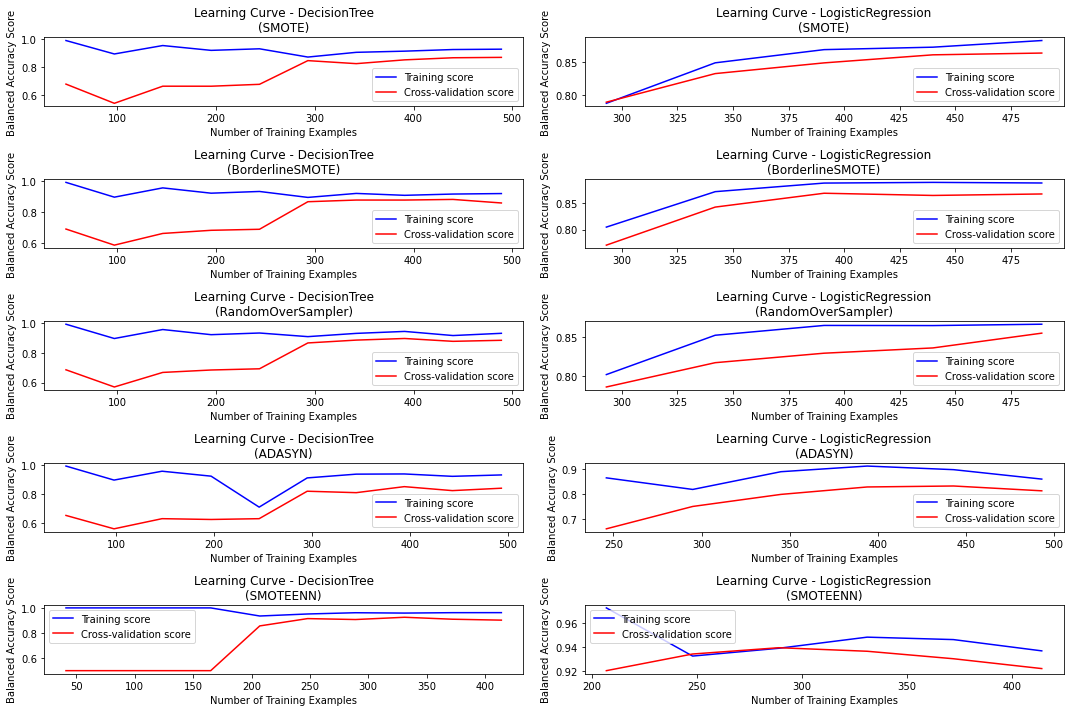

In [40]:
models = [('DecisionTree', DecisionTreeClassifier(criterion='entropy',
                                                  max_depth=5, min_samples_leaf=4,
                                                  min_samples_split=2)),
          ('LogisticRegression', LogisticRegression(C=100, penalty='l2'))]

results = pd.DataFrame(columns=["Resample Method", "Model",
                                "Accuracy Score",
                                "Balanced Accuracy Score", "F1 Score"])

fig, axes = plt.subplots(len(resample_methods1), len(models), figsize=(15, 10))

for i, resample_method in enumerate(resample_methods1):
    x_resampled, y_resampled = resample_method.fit_resample(X_train_transformed, y_train)

    for j, (clf_name, clf) in enumerate(models):
        ax = axes[i][j]

        train_sizes, train_scores, test_scores = learning_curve(
            clf, x_resampled, y_resampled, cv=3, scoring='balanced_accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Plot learning curve
        ax.plot(train_sizes, train_mean, label='Training score', color='blue')
      
        ax.plot(train_sizes, test_mean, label='Cross-validation score', color='red')


        ax.set_xlabel('Number of Training Examples')
        ax.set_ylabel('Balanced Accuracy Score')
        ax.set_title(f'Learning Curve - {clf_name}\n({resample_method.__class__.__name__})')
        ax.legend(loc='best')

plt.tight_layout()
plt.savefig('learning_curves.png')
plt.show()

### Plot the Tree with the best resampled Method : SMOTE

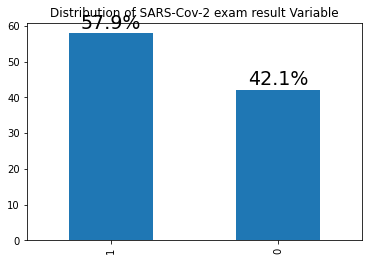

In [41]:
#To check our target variable()

ax = y_resampled.value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y)

    # Annotate plot
    ax.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=19)
    # Add a title to the plot
ax.set_title('Distribution of SARS-Cov-2 exam result Variable')
plt.savefig('Imbalanced_data.png')
# Remove y axis
#ax.get_yaxis().set_visible(False).value_counts(normalize=True).mul(100).plot.bar()


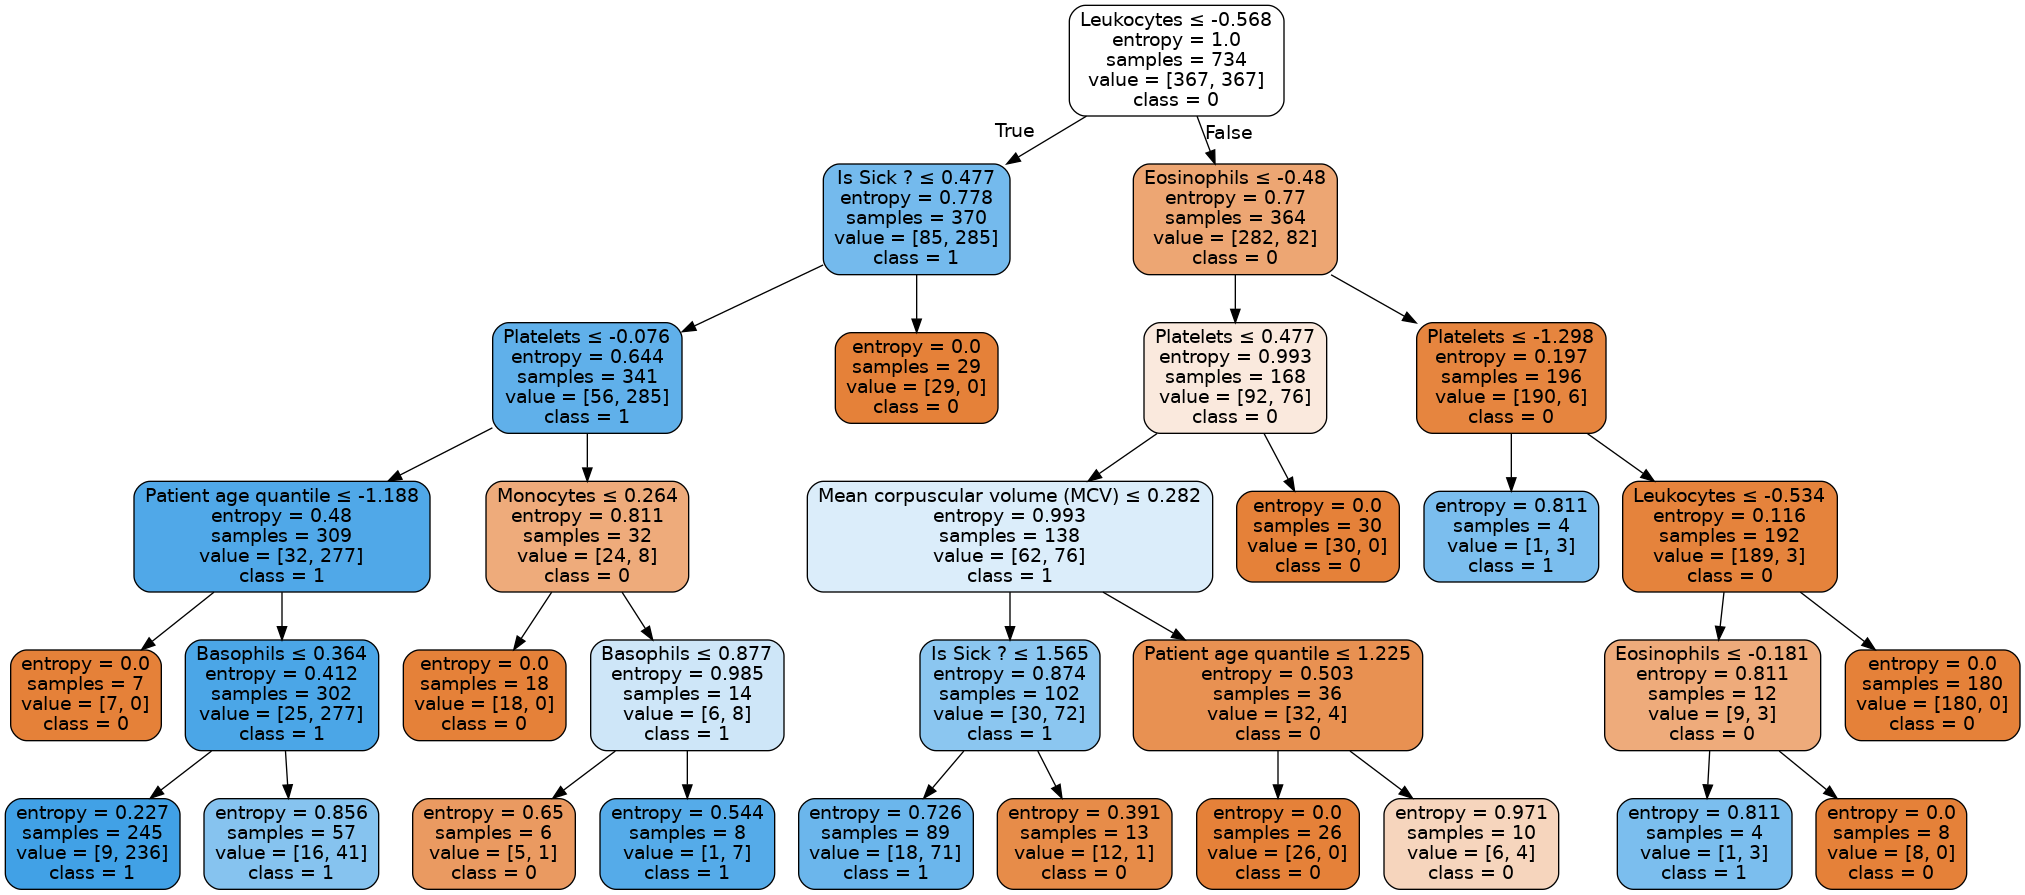

In [42]:
### Draw Decision Tree for the best model 
#OverSampled using Smote 


resample_method = SMOTE(random_state=42)

x_resampled, y_resampled = resample_method.fit_resample(X_train_transformed, y_train)

clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=5,
                             min_samples_leaf=4,min_samples_split=2)

dt = clf.fit(x_resampled, y_resampled)

feature_cols = X_train.columns.tolist()

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('fdec_tree_gini.png')
Image(graph.create_png())

### Further Investigation For each resampled method ( add some strategy of resampling), 
### find the best hyperparameter and compute the metric , 
### then sort the model by ascending = False Accurracy score 

In [43]:
results = pd.DataFrame(columns=["Resample Method", "Model", 
                                "Best Parameters", "Accuracy Score",
                                "Balanced Accuracy Score", "F1 Score",
                                "Recall", "Specificity", "Precision"])

resample_methods2= [SMOTE(random_state=42,sampling_strategy=0.9),
                    BorderlineSMOTE(random_state=42, sampling_strategy=0.8),
                    RandomOverSampler(random_state=42, sampling_strategy= 0.7),
                   ADASYN(random_state = 42, sampling_strategy= 0.8),
                   SMOTEENN(random_state=42, sampling_strategy= 0.7),
                    make_pipeline(SMOTE(random_state=42, sampling_strategy = 0.8), 
                         ADASYN(sampling_strategy = 0.9))
                  ]

# Iterate over each resampling method
for resample_method in resample_methods2:
    model_results = pd.DataFrame(columns=["Model", "Best Parameters", "Accuracy Score", "Balanced Accuracy Score", "F1 Score", "Recall", "Specificity", "Precision"])
    x_resampled, y_resampled = resample_method.fit_resample(X_train_transformed, y_train)

    # Initialize models
    models = {
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'LogisticRegression': LogisticRegression(random_state=42)
    }

    # Iterate over each model
    for model_name, model in models.items():
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=scorers, refit='Balanced Accuracy')
        grid_search.fit(x_resampled, y_resampled)

        # Get the best parameters and the best score
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        # Set the best hyperparameters for the model
        clf = model.set_params(**best_params)

        # Train the model and make predictions
        clf.fit(x_resampled, y_resampled)
        predictions = clf.predict(X_test_transformed)

        # Compute metrics using the best hyperparameters
        accuracy = accuracy_score(y_test, predictions)
        bal_accuracy = balanced_accuracy_score(y_test, predictions)
        f1score = f1_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        specificity = recall_score(y_test, predictions, pos_label=0)
        precision = precision_score(y_test, predictions)

        new_row = {"Model": model_name, "Best Parameters": best_params, "Accuracy Score": accuracy,
                   "Balanced Accuracy Score": bal_accuracy, "F1 Score": f1score, "Recall": recall,
                   "Specificity": specificity, "Precision": precision}
        model_results = model_results.append(new_row, ignore_index=True)

    model_results["Resample Method"] = resample_method.__class__.__name__
    results = pd.concat([results, model_results])

results.sort_values(by="Accuracy Score", ascending=False, inplace=True)
results.to_excel("resampling_results2.xlsx")
results

,Resample Method,Model,Best Parameters,Accuracy Score,Balanced Accuracy Score,F1 Score,Recall,Specificity,Precision
0,SMOTEENN,DecisionTree,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.872222,0.816667,0.656716,0.733333,0.900000,0.594595
1,RandomOverSampler,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.866667,0.840000,0.666667,0.800000,0.880000,0.571429
0,ADASYN,DecisionTree,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.866667,0.773333,0.612903,0.633333,0.913333,0.593750
0,SMOTE,DecisionTree,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.861111,0.783333,0.615385,0.666667,0.900000,0.571429
1,BorderlineSMOTE,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.861111,0.836667,0.657534,0.800000,0.873333,0.558140
0,RandomOverSampler,DecisionTree,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.855556,0.686667,0.500000,0.433333,0.940000,0.590909
1,ADASYN,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.850000,0.816667,0.630137,0.766667,0.866667,0.534884
0,BorderlineSMOTE,DecisionTree,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.827778,0.790000,0.586667,0.733333,0.846667,0.488889
0,Pipeline,DecisionTree,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.827778,0.696667,0.491803,0.500000,0.893333,0.483871
1,SMOTE,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.822222,0.800000,0.589744,0.766667,0.833333,0.479167


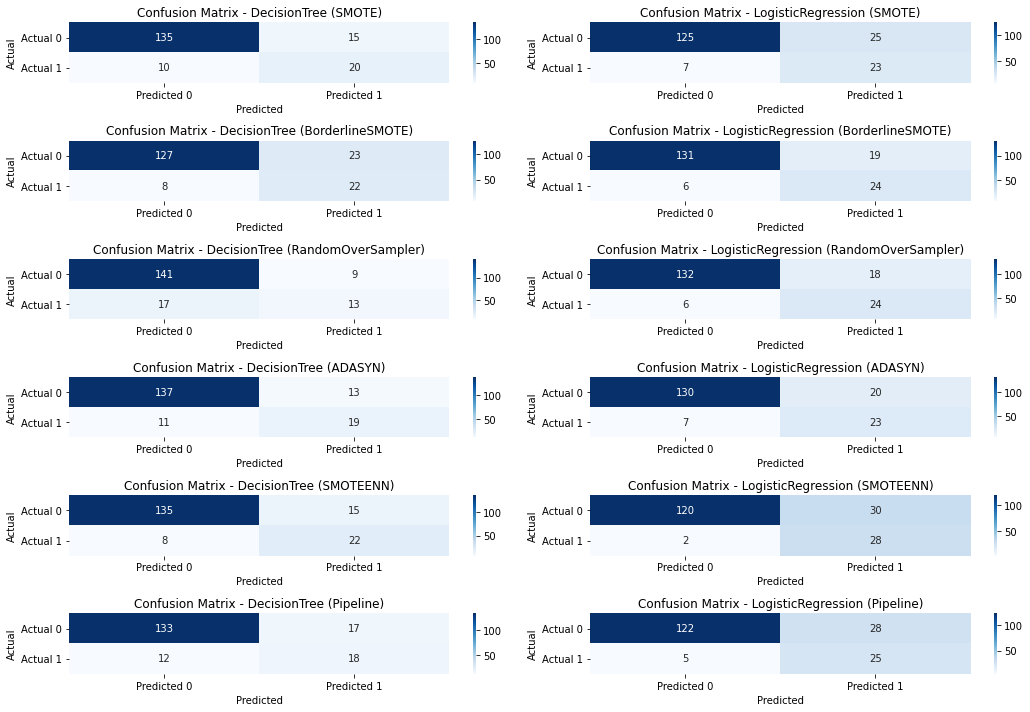

<Figure size 432x288 with 0 Axes>

In [44]:
# List of models
models = [('DecisionTree', DecisionTreeClassifier(random_state=42)),
          ('LogisticRegression', LogisticRegression(random_state=42))]

# DataFrame to store the results
results = pd.DataFrame(columns=["Resample Method", "Model", "Best Parameters"])

# Create a figure with subplots for confusion matrices
fig, axes = plt.subplots(len(resample_methods2), len(models), figsize=(15, 10))

# Iterate over resampling methods
for i, resample_method in enumerate(resample_methods2):
    x_resampled, y_resampled = resample_method.fit_resample(X_train_transformed, y_train)

    # Iterate over models
    for j, (model_name, model) in enumerate(models):
        ax = axes[i][j]  # Get the current subplot

        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=scorers, refit='Balanced Accuracy')
        grid_search.fit(x_resampled, y_resampled)

        # Get the best parameters
        best_params = grid_search.best_params_

        # Set the best hyperparameters for the model
        clf = model.set_params(**best_params)

        # Fit the model on the resampled data and make predictions
        clf.fit(x_resampled, y_resampled)
        predictions = clf.predict(X_test_transformed)

        # Confusion matrix
        cm = confusion_matrix(y_test, predictions)
        cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

        # Plot confusion matrix on the current subplot
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'Confusion Matrix - {model_name} ({resample_method.__class__.__name__})')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')

        new_row = {"Resample Method": resample_method.__class__.__name__, "Model": model_name,
                   "Best Parameters": best_params}
        results = results.append(new_row, ignore_index=True)

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()
plt.savefig('Confusion_matrix_resampling2.png')

# Save the results to a file
results.to_excel("confusion_matrix_results2.xlsx")